In [2]:
import sklearn
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn import metrics
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as FF
import pandas as pd

In [3]:
#Este trabalho foi feito pensando na inserção de dados num arquivo .csv pelo usuário
#Os dados são inseridos pelo caminho até o arquivo no computador
#Após isso os dados são processados e a máquina é treinada e o resultado é apresentado
#Também são exibidas informações quanto a precisão do algoritmo(80%) e dados afins

le = preprocessing.LabelEncoder()

#Inserção do arquivo ao qual quer se prever(ex: mytable.csv)
path = input("Insira o caminho ate o arquivo: ")

predicao = pd.read_csv(path)
#predicao = pd.read_csv("mytable.csv")
df = pd.read_csv("KaggleV2-May-2016.csv")

#Resultados Esperados obtido para calculo de precisão do KNN, exclui todas as colunas menos a de no-show
colunas = ["PatientId",  "AppointmentID", "Gender", "ScheduledDay", "AppointmentDay",  "Age", "Neighbourhood", "Scholarship",
           "Hipertension",  "Diabetes",  "Alcoholism",  "Handcap",  "SMS_received"]
dadoEsperado = predicao
dadoEsperado = dadoEsperado.drop(columns=colunas, axis=1)



#Foram descartadas as tabelas abaixo por não encontrar uma contribuição significativa para o algoritmo
#ou por serem dados categóricos onde não pude tratar
colunasRetiradas = ["PatientId",  "AppointmentID", "ScheduledDay", "AppointmentDay", "Neighbourhood"]

predicao = predicao.drop(columns=colunasRetiradas, axis=1)
df = df.drop(columns=colunasRetiradas, axis=1)

#Pre-processamento
#Caso o no-show seja No ele valerá 0 e caso seja Yes ele se tornará 1
#Caso o gênero seja F ele valerá 0 e caso seja M ele se tornará 1
preprocessamentoMulti = {'No': 0, 'Yes': 1, 'F': 0, 'M': 1}
preprocessamentoSimples = {'No': 0, 'Yes': 1}
preprocessamentoSimplesRev = {0:'No',  1:'Yes'}

predicao = predicao.replace(preprocessamentoMulti)
df = df.replace(preprocessamentoMulti)
dadoEsperado = dadoEsperado.replace(preprocessamentoSimples)

Insira o caminho ate o arquivo: mytable.csv


In [4]:
#Variável responsável por guardar o algoritmo para chamada futura
#Foi definido 28 como sendo o número de vizinhos, pois seu resultado chega a 80% e abaixo disso fica entre 75%~80%
clf = neighbors.KNeighborsClassifier(n_neighbors = 28)
#Preenche o algoritmo com os dados da tabela e seus respectivos resultados e executa o treinamento
clf.fit(df.loc[0:, "Gender":"SMS_received"], df['No-show'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=28, p=2,
           weights='uniform')

In [5]:
#O resultado será os números previstos para cada um dos dados recebidos
resultado = clf.predict(predicao.loc[0:, "Gender":"SMS_received"])
resultado = pd.DataFrame(resultado,  columns = ["NoShow"]) #Altera o nome da coluna para NoShow

#Mostra estatísticas sobre o knn como a precisão dele e demais informações
print("Accuracy:",metrics.accuracy_score(dadoEsperado, resultado))
print(metrics.classification_report(dadoEsperado, resultado))

#Revertendo o preprocessamento para poder plotar um gráfico de barras
resultado = resultado.replace(preprocessamentoSimplesRev)

Accuracy: 0.8005029337803856
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      9532
           1       0.62      0.02      0.04      2398

   micro avg       0.80      0.80      0.80     11930
   macro avg       0.71      0.51      0.46     11930
weighted avg       0.76      0.80      0.72     11930



In [8]:
#Cria o layout para o gráfico
layout = go.Layout(
    autosize=True,
    title='Previsão da quantidadade de pessoas irão as consultas',
    paper_bgcolor='#7f7f7f',
    plot_bgcolor='#c7c7c7'
)


#Inicia a plotagem do gráfico
trace = go.Histogram(x = resultado['NoShow'])
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [33]:
#Plotagem alternativa gráfico de pizza
import matplotlib.pyplot as plt

In [34]:
total = resultado.count()
pieChart = resultado.groupby('NoShow').size()
labels = 'Yes', 'No'

In [35]:
sizes = [(pieChart['Yes']/total)*100, (pieChart['No']/total)*100]

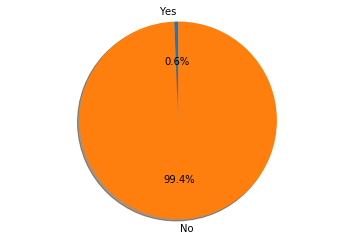

In [36]:
fig1, ax1 = plt.subplots()
explode = (0, 0)

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()